In [1]:
#importing libraries 
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt 
import ast

#loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning data 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\ranveer\AppData\Local\Temp\ipykernel_7188\2960257010.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot( job_list , labels = job_titles , vert = False)


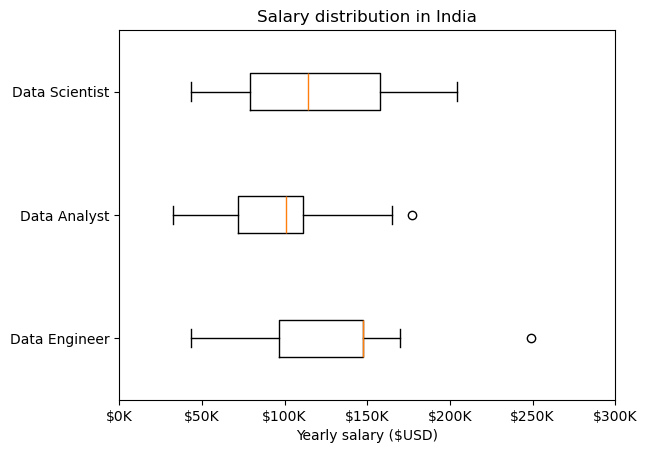

In [21]:
job_titles = [ 
    'Data Engineer' ,
    'Data Analyst',
    'Data Scientist'
]
df_india = df[(df['job_title_short'].isin(job_title)) & (df['job_country'] == 'India')].copy()
df_india = df_india.dropna(subset = ['salary_year_avg'])
job_list = [df_india[df_india['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot( job_list , labels = job_titles , vert = False)
plt.title('Salary distribution in India')
plt.xlabel('Yearly salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
plt.xlim(0,300000)
plt.show()

In [19]:
job_list[0]

2022      156500.0
2785      147500.0
7946      147500.0
28368     147500.0
31356     131580.0
            ...   
773374    147500.0
774539    147500.0
777184    165000.0
781832    147500.0
785395     64800.0
Name: salary_year_avg, Length: 169, dtype: float64